In [1]:
EXP_NAME = "EXP_2_3"

In [2]:
import torch; torch.manual_seed(0)
import numpy as np
from PIL import Image
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
import torch.nn as nn
from function.Dir import Dir
import importlib

VAE_module = importlib.import_module(f'function.VAE_{EXP_NAME}')
VAE = getattr(VAE_module, 'VAE')

BATCH_SIZE = 128
EPOCHS = 2000
LATENTDIM = 256
DEVICE = torch.device("cuda")
# model = f'{Dir.models()}/model_{EPOCHS}epo_{BATCH_SIZE}bth_{LATENTDIM}latn.pth'
model = f"{Dir.models()}/EXP_2_3_model_2000epo_128bth_256latn.pth"

In [3]:
with torch.no_grad(): # 不要输出
    vae = VAE(LATENTDIM).to(DEVICE)
    vae = nn.DataParallel(vae) # 并行运算带来的修饰vae的代码
    vae.load_state_dict(torch.load(model, map_location=DEVICE)) 
    vae.eval()

In [4]:
first_fig_num = 4000
iteration_times = 1
do_save = 0
# for i in range(first_fig_num,first_fig_num+5):
#     img_Confocal, img_STED, img_STED_HC = Image.open(f"{Dir.Confocal()}/{i}_Confocal.png"), Image.open(f"{Dir.STED()}/{i}_STED.png") ,Image.open(f"{Dir.STED_HC()}/{i}_STED_HC.png")
#     preprocess = transforms.Compose([transforms.ToTensor()])
#     img_tobe_iterated = img_Confocal
#     for j in range(iteration_times): # 迭代
#         img_tobe_iterated= preprocess(img_tobe_iterated)
#         img_tobe_iterated = img_tobe_iterated.unsqueeze(0).to(DEVICE)  # 添加批次维度，变为 shape [1, C, H, W]
#         with torch.no_grad():
#             img_tobe_iterated = vae(img_tobe_iterated)
#         img_tobe_iterated = img_tobe_iterated[0][0].squeeze(0)
#         img_tobe_iterated = img_tobe_iterated.to('cpu')
#         img_tobe_iterated = img_tobe_iterated.numpy()
#         img_tobe_iterated = (img_tobe_iterated - img_tobe_iterated.min()) / (img_tobe_iterated.max() - img_tobe_iterated.min()) * 255.0
#         img_tobe_iterated = img_tobe_iterated.astype(np.uint8)
#         img_tobe_iterated = Image.fromarray(img_tobe_iterated)
#     img_SR = img_tobe_iterated

#     fig,ax = plt.subplots(1,4)
#     plt.rcParams['figure.figsize'] = [20, 10]
#     ax[0].imshow(img_Confocal,cmap='hot')
#     ax[0].set_title('Confocal')
#     ax[1].imshow(img_SR,cmap='hot')
#     ax[1].set_title('Super-resolution')
#     ax[2].imshow(img_STED,cmap='hot')
#     ax[2].set_title('STED')
#     ax[3].imshow(img_STED_HC,cmap='hot')
#     ax[3].set_title('STED_HC')
#     plt.savefig(f'{EXP_NAME}.png')
#     plt.show()
#     if do_save == 1:
#         img_Confocal.save(f'{Dir.imgs()}/{i}_Confocal.png')
#         img_SR.save(f'{Dir.imgs()}/{i}_SR.png')
#         img_STED.save(f'{Dir.imgs()}/{i}_STED.png')
#         img_STED_HC.save(f'{Dir.imgs()}/{i}_STED_HC.png')

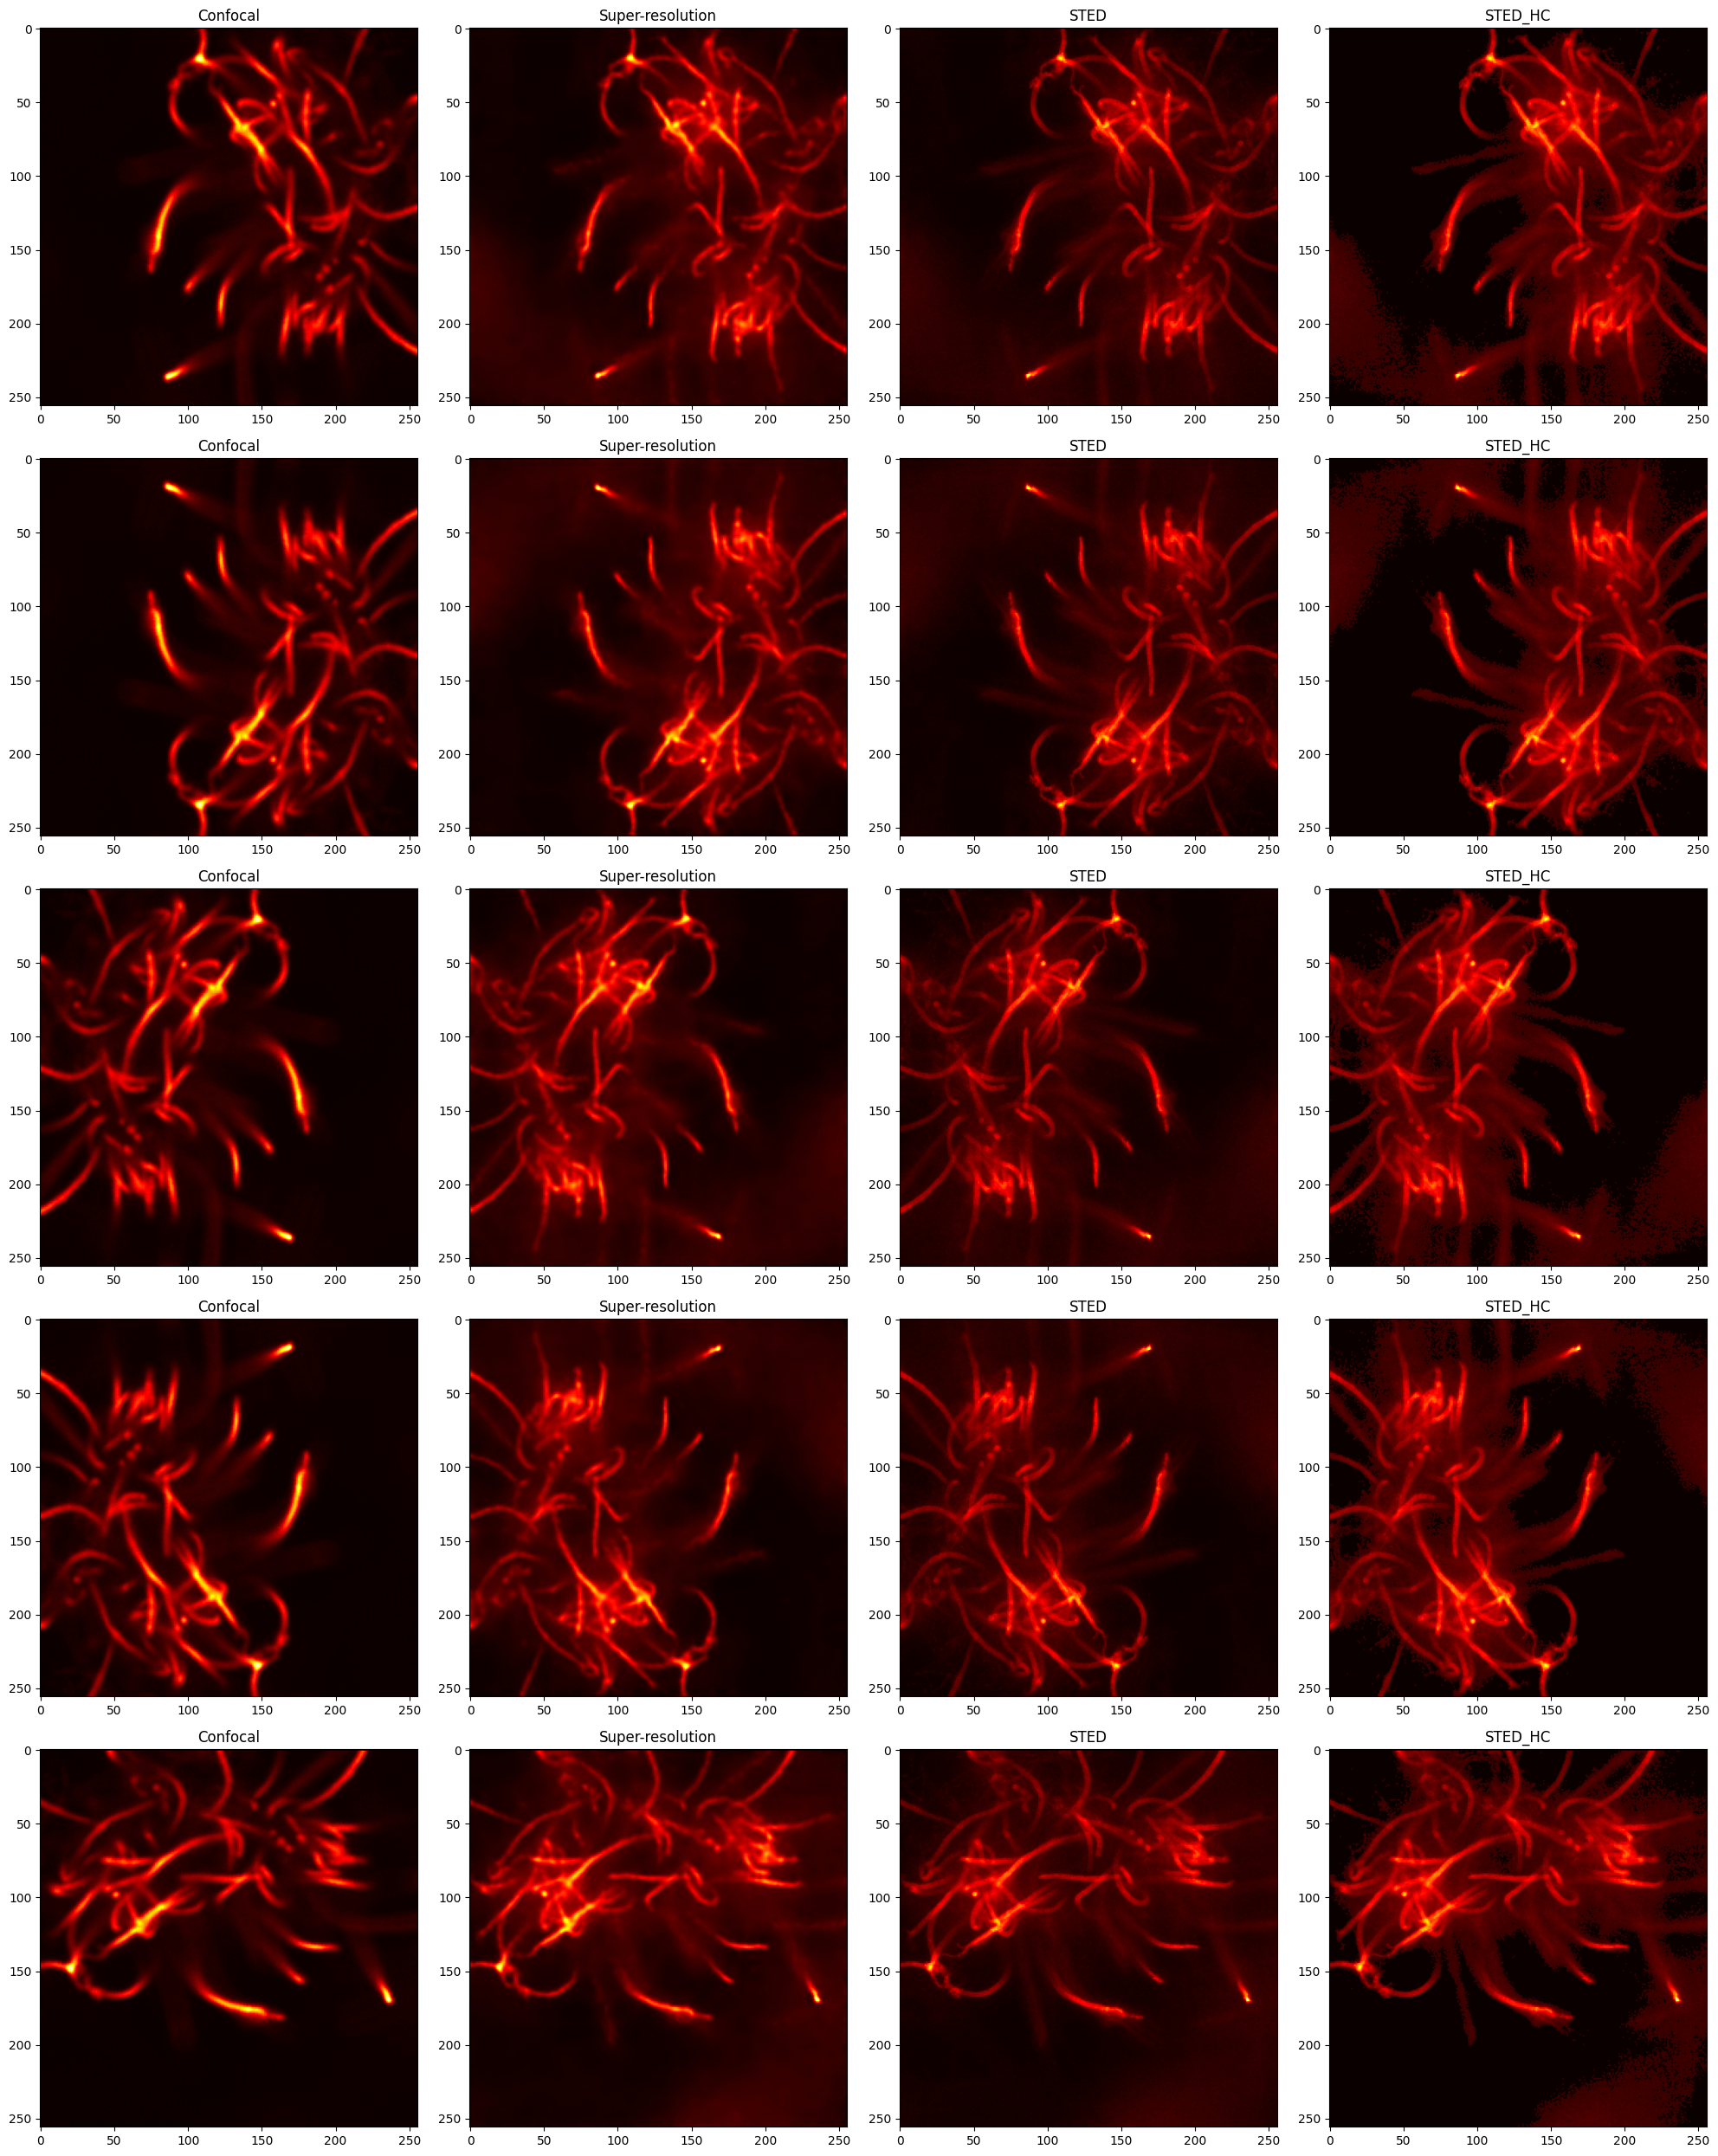

In [5]:
fig, axs = plt.subplots(5, 4, figsize=(20, 25))  # 创建一个5x4的子图网格

for i in range(first_fig_num, first_fig_num+5):
    img_Confocal, img_STED, img_STED_HC = Image.open(f"{Dir.Confocal()}/{i}_Confocal.png"), Image.open(f"{Dir.STED()}/{i}_STED.png") ,Image.open(f"{Dir.STED_HC()}/{i}_STED_HC.png")
    preprocess = transforms.Compose([transforms.ToTensor()])
    img_tobe_iterated = img_Confocal
    for j in range(iteration_times): # 迭代
        img_tobe_iterated= preprocess(img_tobe_iterated)
        img_tobe_iterated = img_tobe_iterated.unsqueeze(0).to(DEVICE)  # 添加批次维度，变为 shape [1, C, H, W]
        with torch.no_grad():
            img_tobe_iterated = vae(img_tobe_iterated)
        img_tobe_iterated = img_tobe_iterated[0][0].squeeze(0)
        img_tobe_iterated = img_tobe_iterated.to('cpu')
        img_tobe_iterated = img_tobe_iterated.numpy()
        img_tobe_iterated = (img_tobe_iterated - img_tobe_iterated.min()) / (img_tobe_iterated.max() - img_tobe_iterated.min()) * 255.0
        img_tobe_iterated = img_tobe_iterated.astype(np.uint8)
        img_tobe_iterated = Image.fromarray(img_tobe_iterated)
    img_SR = img_tobe_iterated

    axs[i-first_fig_num, 0].imshow(img_Confocal, cmap='hot')
    axs[i-first_fig_num, 0].set_title('Confocal')
    axs[i-first_fig_num, 1].imshow(img_SR, cmap='hot')
    axs[i-first_fig_num, 1].set_title('Super-resolution')
    axs[i-first_fig_num, 2].imshow(img_STED, cmap='hot')
    axs[i-first_fig_num, 2].set_title('STED')
    axs[i-first_fig_num, 3].imshow(img_STED_HC, cmap='hot')
    axs[i-first_fig_num, 3].set_title('STED_HC')

plt.tight_layout()  # 调整子图之间的间距
plt.savefig(f'{EXP_NAME}.png')
plt.show()
